In [156]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [157]:
df = pd.read_csv("2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [158]:
y_data = df["Score"].values
x_data = df["GDP per capita"].values
x_2 = df["Social support"].values
x_3 = df["Healthy life expectancy"].values
x_4 = df["Freedom to make life choices"].values
x_6 = df["Generosity"].values
x_5 = df["Perceptions of corruption"].values
country = df["Country or region"].values

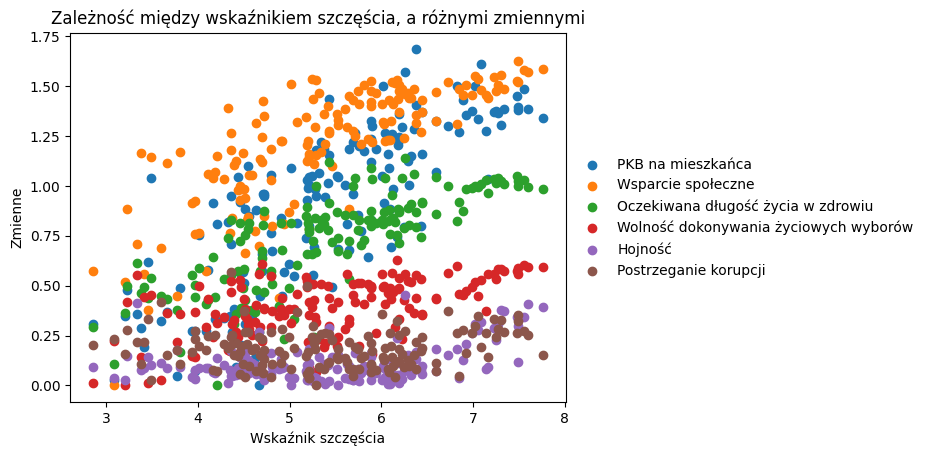

In [159]:
plt.scatter(y_data, x_data, label = "PKB na mieszkańca") # patrząc na wykresy widzimy ze układają sie one liniowo, a najlepiej pasuje pkb  per capita, dlatego tez bedziemy to badac
plt.scatter(y_data, x_2, label = "Wsparcie społeczne")   # wygląda najbardziej liniowo
plt.scatter(y_data, x_3, label = "Oczekiwana długość życia w zdrowiu")
plt.scatter(y_data, x_4, label = "Wolność dokonywania życiowych wyborów")
plt.scatter(y_data, x_5, label = "Hojność")
plt.scatter(y_data, x_6, label = "Postrzeganie korupcji")
plt.title("Zależność między wskaźnikiem szczęścia, a różnymi zmiennymi") 
plt.ylabel("Zmienne")
plt.xlabel("Wskaźnik szczęścia")
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#  **4. REGRESJA LINIOWA** 

In [160]:
# wydzielam dane do prognozowania, czyli x_0 i y_0, a na pozostałych dokonam całej regresji liniowej i analizy
x_0 = []
y_0 = []
indexes_to_delete = []
for i in range(len(x_data)):

    if x_data[i] >= 1.5: # wybieram wszystkie punkty predykcji gdzie x>1.5
        x_0.append(x_data[i])
        y_0.append(y_data[i])

        indexes_to_delete.append(i)

x = np.delete(x_data, indexes_to_delete)
y = np.delete(y_data, indexes_to_delete)


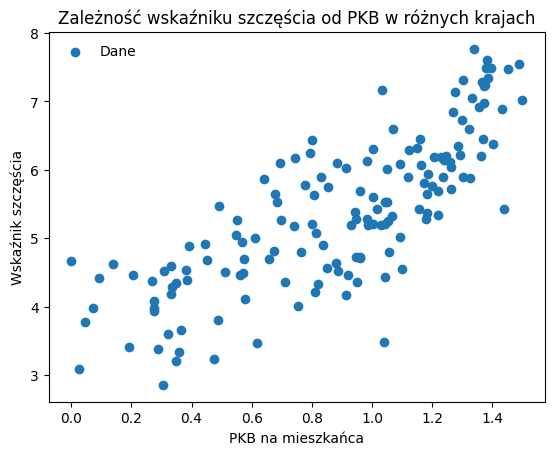

In [161]:
plt.scatter(x, y, label = 'Dane') # Widzimy, że układają sie te dane liniowo wiec mozna skorzystac z regresji liniowej
plt.title("Zależność wskaźniku szczęścia od PKB w różnych krajach") 
plt.xlabel("PKB na mieszkańca")
plt.ylabel("Wskaźnik szczęścia")
plt.legend(frameon=False)
plt.show()

In [162]:
def least_squares_method(x, y): #klasyczna metoda najmniejszych kwadratow dla liniowego modelu
    b_1 = np.sum(((x - np.mean(x))*y)/np.sum((x - np.mean(x))**2))
    b_0 = np.mean(y) - b_1*np.mean(x)
    
    return b_0, b_1

In [163]:
b_0, b_1 = least_squares_method(x, y)
print(f"b_0 = {b_0}, b_1 = {b_1}")

b_0 = 3.359056795458224, b_1 = 2.277852205990987


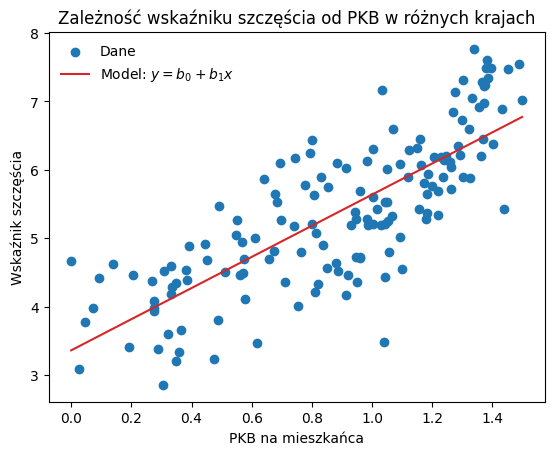

In [164]:
new_x = np.linspace(np.min(x), np.max(x), len(x)) 
est_y = b_0 + b_1*new_x

plt.scatter(x, y, label = 'Dane')
plt.plot(new_x, b_0 + b_1*new_x, c = 'C3', label = "Model: $y = b_{0} + b_{1}x$")
plt.title("Zależność wskaźniku szczęścia od PKB w różnych krajach")
plt.xlabel("PKB na mieszkańca")
plt.ylabel("Wskaźnik szczęścia")
plt.legend(frameon=False)
plt.show()

In [165]:
# wspołczynnik determinancji
R_squred = np.sum((est_y - np.mean(y))**2)/np.sum((y - np.mean(y))**2)
print(f"Wspołczynnik determinacji R^2: {R_squred}") # jest bliski 1 wiec prosta regresji jest dobrze dobrana

Wspołczynnik determinacji R^2: 0.8792547366247092


In [166]:
SST = np.sum((y - np.mean(y))**2)
print(f"Całkowita suma kwadratów: {SST}") 

Całkowita suma kwadratów: 184.96229701986758


In [167]:
SSE = np.sum((y - (b_0 + b_1*x))**2)
print(f"Błąd sumy kwadratów błedów: {SSE}") 

Błąd sumy kwadratów błedów: 69.41853739712181


In [168]:
SSR = np.sum(((b_0 + b_1*x) - np.mean(y))**2)
print(f"Regresyjna suma błędów: {SSR}") 

Regresyjna suma błędów: 115.54375962274554


In [169]:
SSR + SSE 

184.96229701986735

# **5. Przedziały ufności dla $\beta_{0}$ i $\beta_{1}$**

In [171]:
def przedzialy_ufonsci(Alpha, x, y): # przedzialy ufnosci zostały wyznaczone z klasycznych wzorów, przy założeniu ze sigma nie jest znana stad estymacja s
    n = len(x)
    est_beta_1 = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sum((x - np.mean(x))**2)
    est_beta_0 = np.mean(y) - est_beta_1*np.mean(x)
    s = np.sqrt(np.sum((y - (est_beta_0 + est_beta_1*x))**2)/(n-2))

    res_left_beta_0 = []
    res_right_beta_0 = []
    res_left_beta_1 = []
    res_right_beta_1 = []

    for alpha in Alpha: #badamy dla roznych alph
        t = stats.t.ppf(1 - (alpha/2), n-2)

        left_beta_1 = est_beta_1 - t*(s/np.sqrt(np.sum((x - np.mean(x))**2)))
        right_beta_1 = est_beta_1 + t*(s/np.sqrt(np.sum((x - np.mean(x))**2)))
        left_beta_0 = est_beta_0 - t*s*np.sqrt((1/n) + ((np.mean(x)**2)/np.sum((x - np.mean(x))**2)))
        right_beta_0 = est_beta_0 + t*s*np.sqrt((1/n) + ((np.mean(x)**2)/np.sum((x - np.mean(x))**2)))

        res_left_beta_0.append(left_beta_0)
        res_right_beta_0.append(right_beta_0)
        res_left_beta_1.append(left_beta_1)
        res_right_beta_1.append(right_beta_1)
        
      
    return res_left_beta_0, res_right_beta_0, res_left_beta_1, res_right_beta_1

In [172]:
alpha = np.arange(0.05, 1, 0.05)
alpha # nie moze byc od 0 i 1!

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [173]:
left_b_0, right_b_0, left_b_1, right_b_1 = przedzialy_ufonsci(alpha, x, y)

In [174]:
print(f"Przedziały ufności na poziomie 95% b_0 dla przykładowej alphy")
print(f"alpha = {alpha[0]}:   {[left_b_0[0], right_b_0[0]]}\n\n")

print(f"Przedziały ufności b_1 dla przykładowej alphy")
print(f"alpha = {alpha[0]}:   {[left_b_1[0], right_b_1[0]]}")


Przedziały ufności na poziomie 95% b_0 dla przykładowej alphy
alpha = 0.05:   [3.08384281612917, 3.634270774787275]


Przedziały ufności b_1 dla przykładowej alphy
alpha = 0.05:   [1.9920360810674222, 2.5636683309145547]


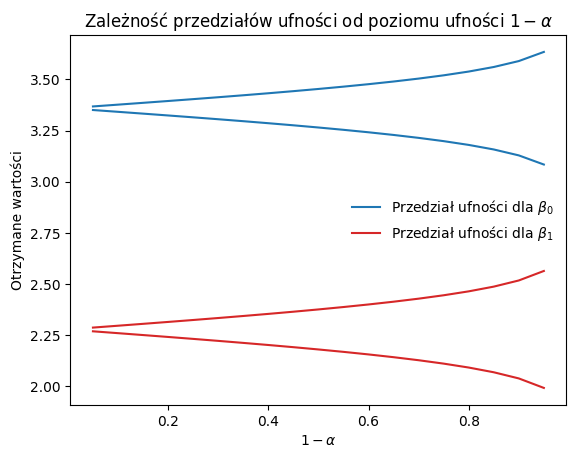

In [175]:
plt.plot(1 - alpha, left_b_0, c="C0", label = "Przedział ufności dla $\\beta_{0}$") # widac z wykresow ze im wiekszy poziom ufności tym przedział bedzie wiekszy
plt.plot(1 - alpha, right_b_0, c="C0")
plt.plot(1 - alpha, left_b_1, c="C3", label = "Przedział ufności dla $\\beta_{1}$")
plt.plot(1 - alpha, right_b_1, c="C3")
plt.title("Zależność przedziałów ufności od poziomu ufności $1 -\\alpha$")
plt.xlabel("$1 - \\alpha$")
plt.ylabel("Otrzymane wartości")
plt.legend(frameon=False)
plt.show()

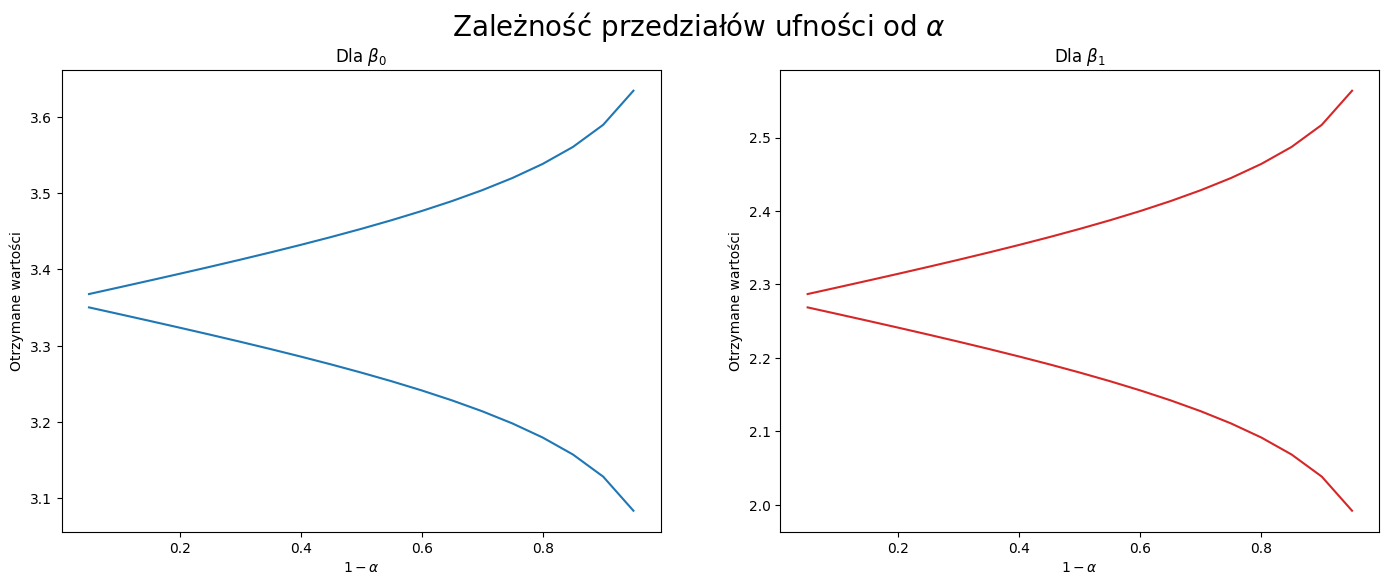

In [176]:
# wizualizacja wyników
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize = (17, 6))
fig.suptitle("Zależność przedziałów ufności od $\\alpha$", fontsize=20)

ax_1.plot(1 - alpha, left_b_0, c="C0")
ax_1.plot(1 - alpha, right_b_0, c="C0")
ax_1.set_ylabel("Otrzymane wartości")
ax_1.set_xlabel("$1 - \\alpha$")
ax_1.set_title("Dla $\\beta_{0}$")


ax_2.plot(1 - alpha, left_b_1, c="C3")
ax_2.plot(1 - alpha, right_b_1, c="C3")
ax_2.set_ylabel("Otrzymane wartości")
ax_2.set_xlabel("$1 - \\alpha$")
ax_2.set_title("Dla $\\beta_{1}$")

plt.show()

# **6. Analiza residuów**

In [177]:
est_y = b_0 + b_1*x #y z daszkiem
residua = y - est_y 

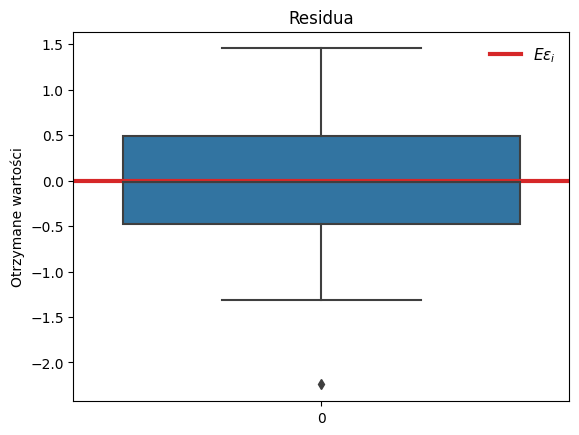

In [178]:
sns.boxplot(residua) # widzimy ze mamy tylko jedną obserwacje odstającą
plt.axhline(0, c="C3", label = "$E\epsilon_{i}$", linewidth = 3)
plt.title("Residua")
plt.ylabel("Otrzymane wartości")
plt.legend(frameon=False, fontsize = 11)
plt.show()

### OBSERWACJA ODSTAJĄCA

In [179]:
def delete_points(x, y):
    errors = y - (b_0 + b_1*x)

    Q_1 = np.quantile(errors, 0.25, interpolation = "midpoint")
    Q_3 = np.quantile(errors, 0.75, interpolation = "midpoint")
    IQR = Q_3 - Q_1

    index =  []
    result = []
    for i in range(len(errors)):
        if (Q_1 - 1.5*IQR) <=  errors[i] <= (Q_3 + 1.5*IQR):
            pass
        else:
            result.append(errors[i])
            index.append(i)

    return result, index

In [180]:
out_obser, index = delete_points(x, y)
print(f"Odstająca obserwacja ma wartość {out_obser[0]} i występuje w {country[index[0]]}")

Odstająca obserwacja ma wartość -2.242300941894841 i występuje w Madagascar


### WYKRESY DO ANALIZY RESIDUOW

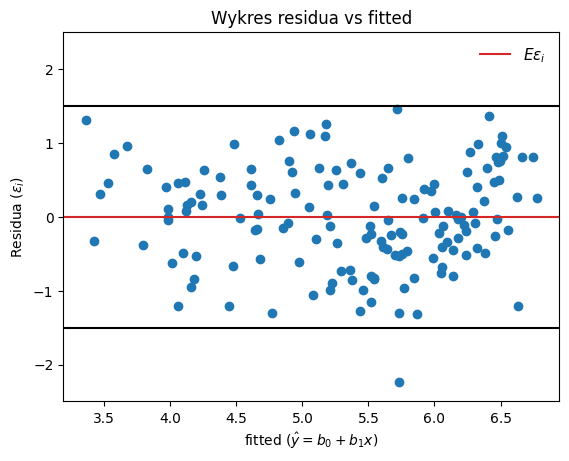

In [181]:
plt.scatter(est_y, residua) # ZAGROZONE BO 1 ODSTAJACA WARTOSC
# sns.residplot(x=x, y=y) # załatwia wszystko bez własnego liczenia residuów
plt.axhline(0, c="C3", label = "$E\epsilon_{i}$") # tutaj wiariancja jest w miare stała
plt.axhline(1.5, c="black")
plt.axhline(-1.5, c="black")
plt.ylim(-2.5, 2.5)
plt.ylabel("Residua ($\epsilon_{i}$)")
plt.xlabel("fitted ($\\^{y} = b_{0} + b_{1}x$)")
plt.title("Wykres residua vs fitted")
plt.legend(frameon=False, fontsize = 11)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


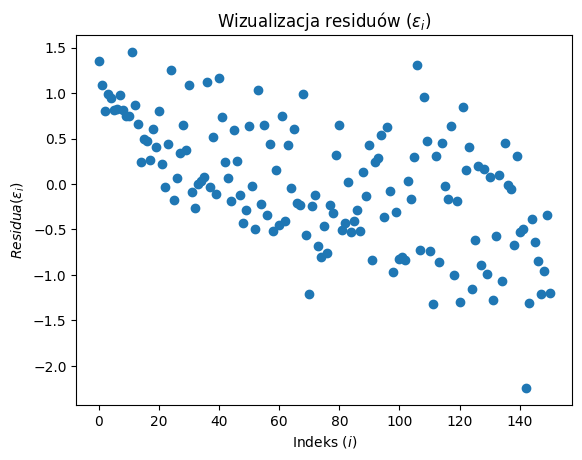

In [182]:
plt.scatter(range(len(residua)), residua) # tutaj bedzie się lokalnie zachowywac??????
plt.ylabel("$Residua (\epsilon_{i})$") #  rozrzut na poczatku jest znacznie mniejszy niz dla tych pozniejszych
plt.xlabel("Indeks ($i$)") # tez nie rozkłada sie wokół zera! bo maleje 
plt.title("Wizualizacja residuów ($\epsilon_{i}$)")
plt.legend(frameon=False)
plt.show()

In [183]:
r_var = [] # sprawdzenie wariacji i mediany z próby w oknie
r_mean = []
for j in range(0, 146):
    r_var.append(np.var(residua[j: j+20]))
    r_mean.append(np.mean(residua[j: j+20]))

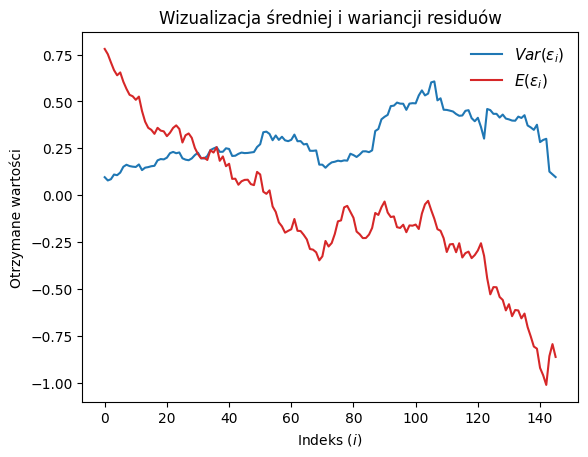

In [184]:
plt.plot(range(len(r_var)), r_var, label = "$Var(\epsilon_{i})$")
plt.plot(range(len(r_mean)), r_mean, c="C3", label = "$E(\epsilon_{i})$")
plt.ylabel("Otrzymane wartości")
plt.xlabel("Indeks ($i$)")
plt.title("Wizualizacja średniej i wariancji residuów")
plt.legend(frameon=False, fontsize = 11)
plt.show()


### SPRAWDZENIE NIEZALEŻNOŚCI Z AUTOKOWARIANCJI

In [185]:
def estimate_autocov(x, h):
    n = len(x)
    result = np.zeros(len(h))
    for i in range(len(h)):
        est_gamma = 0

        for t in range(n - np.abs(h[i])):
            est_gamma += (1/n)*(x[t] - np.mean(x))*(x[t + np.abs(h[i])] - np.mean(x))
            
        result[i] = est_gamma

    return result


In [186]:
h = np.arange(-20, 21)

est_autocov = estimate_autocov(residua, h) 
est_autocov_0 = estimate_autocov(residua, np.array([0]))

est_autocor = est_autocov/est_autocov_0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


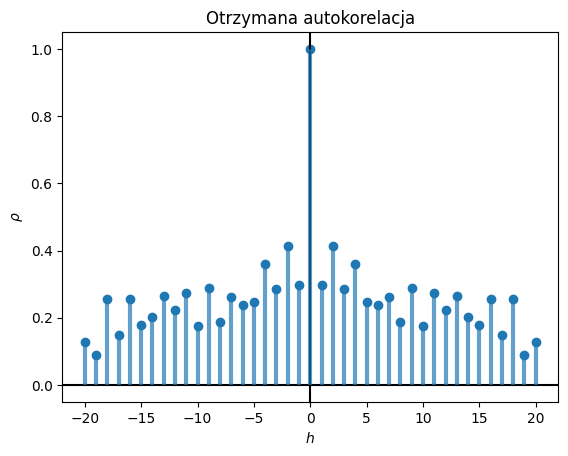

In [187]:
plt.axhline(0, c="black") # WIDZIMY ZE ZMIENNE SA SKORELOWANE !!!! NIE MAMY SPELNIONEGO ZALOZENIA! residua są zalezne, jakas zaleznosc jest!
plt.axvline(0, c="black") # dla badanych danych autokorelacja jest srednim pomyslem, ale trzeba wykonac polecenia
plt.scatter(h, est_autocor, c = "C0")
plt.vlines(h, 0, est_autocor, colors = "C0", lw = 3, alpha = 0.7)
plt.xlabel("$h$")
plt.ylabel("$\\rho$")
plt.title("Otrzymana autokorelacja")
plt.legend(frameon=False)
plt.show()

### TESTOWANIE CZY NORMALNY
TUTAJ ZAKŁADAMY ZE MAMY ROZKŁAD IID

In [188]:
s = np.sqrt(np.sum((residua - np.mean(residua))**2)/(len(residua)-1))
norm_residua = (residua - np.mean(residua))/s
print(f"s = {s}")

s = 0.680286887507135


In [189]:
print("Test kołmogorowa-Smirnowa:   " +  str(stats.kstest((residua - np.mean(residua))/s, "norm")))
print("Test Shapiro_Wilka:   " +  str(stats.shapiro(residua)))
print("Test Jarque-Bera:   " + str(stats.jarque_bera(residua)))

Test kołmogorowa-Smirnowa:   KstestResult(statistic=0.042752229257966956, pvalue=0.9342407139419808)
Test Shapiro_Wilka:   ShapiroResult(statistic=0.9898749589920044, pvalue=0.35025760531425476)
Test Jarque-Bera:   Jarque_beraResult(statistic=1.5264649990457304, pvalue=0.4661571362128518)


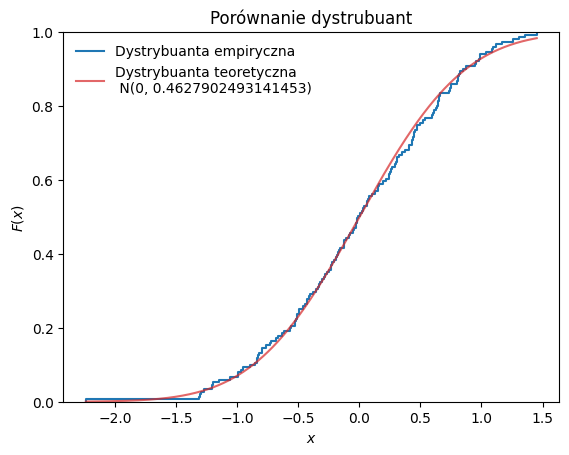

In [190]:
sns.ecdfplot(data = residua, label = "Dystrybuanta empiryczna")

t = np.linspace(np.min(residua), np.max(residua), 1000)
th_F = stats.norm.cdf(t, 0, s)
plt.plot(t, th_F, label = f"Dystrybuanta teoretyczna\n N(0, {s**2})", alpha = 0.7, color = "C3")

plt.title("Porównanie dystrubuant")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False)
plt.show()

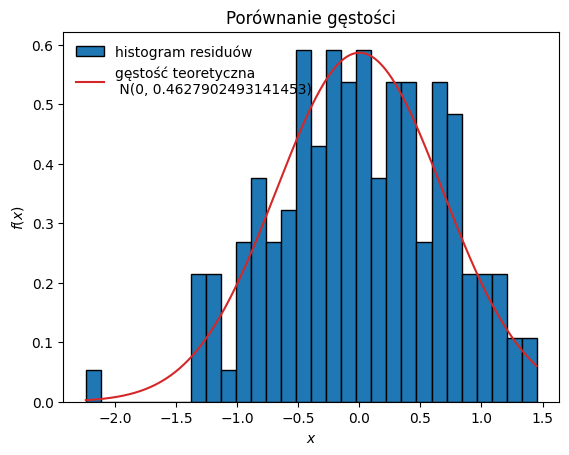

In [191]:
plt.hist(residua, bins = 30, edgecolor='k', density=True, label = "histogram residuów")

f_theo = stats.norm.pdf(t, 0, s) 
plt.plot(t, f_theo, label = f"gęstość teoretyczna\n N(0, {s**2})", color = "C3")

plt.title("Porównanie gęstości")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False)
plt.show()

# **7. PREDYKCJA**
Zakładamy, że residua spełniają wszystkie założenia z analizy residuów

In [192]:
def predykcja(alpha, x_0, x_2, y_2):
    res_unknown_left = []
    res_unknown_right = []
    n = len(x_2)

    est_beta_1 = np.sum((x_2 - np.mean(x_2))*(y_2 - np.mean(y_2)))/np.sum((x_2 - np.mean(x_2))**2)
    est_beta_0 = np.mean(y_2) - est_beta_1*np.mean(x_2)

    s = np.sqrt(np.sum((y_2 - (est_beta_0 + est_beta_1*x_2))**2)/(n-2))

    t = stats.t.ppf(1 - (alpha/2), n-2)

    for i in range(len(x_0)):
        est_y_0 = est_beta_0 + est_beta_1*x_0[i]

        res_unknown_left.append(est_y_0 - t*s*np.sqrt(1 + (1/n) + ((x_0[i] - np.mean(x_2))**2)/np.sum((x_2 - np.mean(x_2))**2)))
        res_unknown_right.append(est_y_0 + t*s*np.sqrt(1 + (1/n) + ((x_0[i] - np.mean(x_2))**2)/np.sum((x_2 - np.mean(x_2))**2))) 
      
    return res_unknown_left, res_unknown_right

In [193]:
alpha = 0.05
unknown_left, unknown_right = predykcja(alpha, x_0, x, y)

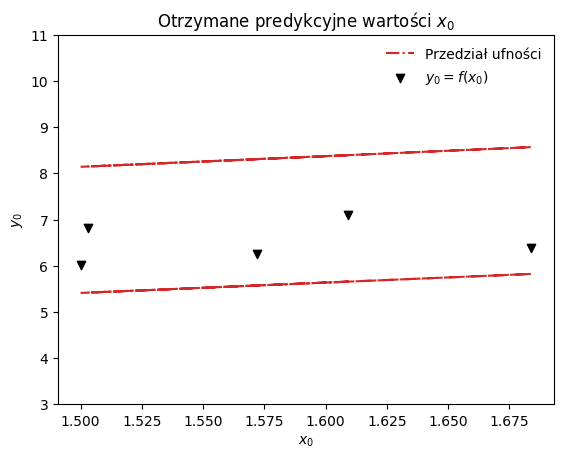

In [194]:
plt.plot(x_0, unknown_left, c='C3',  linestyle="-.", linewidth = 1.5, label = "Przedział ufności") # widzimy ze prognozowane dane ( te obciete) rzeczywiście są w przedziale prydykcji
plt.plot(x_0, unknown_right, c='C3', linestyle="-.", linewidth = 1.5)                              # zatem został on dobrany poprawnie
plt.scatter(x_0, y_0, c="black", marker = "v", label = "$y_{0} = f(x_{0})$")
plt.ylabel("$y_{0}$")
plt.xlabel("$x_{0}$")
plt.ylim(3, 11)
plt.title(f"Otrzymane predykcyjne wartości $x_{0}$")
plt.legend(frameon=False)
plt.show()

# NANIESIENIE NA WYKRES REGRESJI  NOWYCH PREDYKOWANYCH DANYCH!

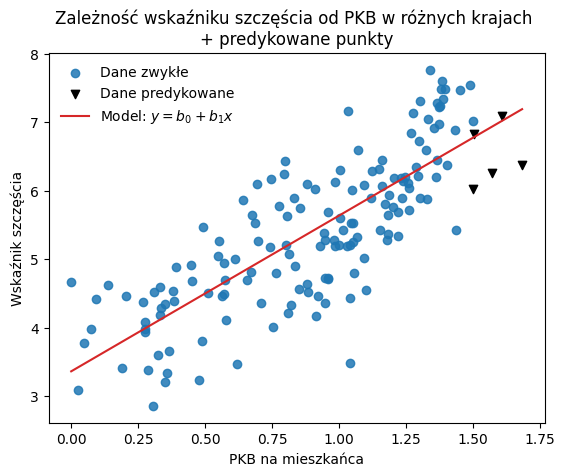

In [195]:
new_x = np.linspace(np.min(x_data), np.max(x_data), 1000)    

plt.scatter(x, y, label = 'Dane zwykłe', alpha = 0.85)
plt.scatter(x_0, y_0, label = 'Dane predykowane', c="black", marker = "v")
plt.plot(new_x, b_0 + b_1*new_x, c = 'C3', label = "Model: $y = b_{0} + b_{1}x$")
plt.title("Zależność wskaźniku szczęścia od PKB w różnych krajach \n+ predykowane punkty")
plt.xlabel("PKB na mieszkańca")
plt.ylabel("Wskaźnik szczęścia")
plt.legend(frameon=False)
plt.show()